# MSP Exercise
# Numerical Integration Methods

## Sample Circuit

<img src="Circuit_RL.png" width="300" align="left">

$L$=$1 mH$  
$E$=$2 V$   
$R$=$1.0 \Omega$   

## Differential Equation 

$\frac{di}{dt}=-\frac{R}{L}i+\frac{1}{L}E$

## Analytical solution
$i(t)=\frac{E}{R}(1-e^{-\frac{R}{L}t})$


## Numerical solution 

$i(t)=i(t-\varDelta T)+\frac{1}{L}\int\limits_{t-\varDelta T}^{t} (-Ri(t)+E)\varDelta \tau$

### Eurler Forward integration method   
$I(k) = (1-T_s\frac{R}{L}) I(k-1) + \frac{T_s}{L}E$

### Eurler Backward integration method  
$I(k) = \frac{1}{(1+T_s\frac{R}{L})} I(k-1) + \frac{\frac{T_s}{L}}{(1+T_s\frac{R}{L})}E$

### Trapezoidal Rule 
$I(k) = \frac{1-T_s\frac{R}{2L}}{(1+T_s\frac{R}{2L})} I(k-1) + \frac{\frac{T_s}{L}}{(1+T_s\frac{R}{2L})}E$

## Circuit and Simulation Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
np.set_printoptions(sign=' ')

# Circuit parameters:
E = 2.0
L = 1.0e-3
R = 1.0

# Total simulation time
T_total = 0.01
# Simulaiton time step 
Ts = 0.1e-3
# Number of simulation time steps
npoint = int(np.round(T_total/Ts))

print('Total simulation time: ' + str(T_total))
print('\nSimulation time step: ' + str(Ts))

Total simulation time: 0.01

Simulation time step: 0.0001


## Simulation

In [2]:
# Solution vectors for current I
I_analytical = np.zeros((1, npoint)) 
I_ef = np.zeros((1, npoint)) 
I_eb = np.zeros((1, npoint)) 
I_tr = np.zeros((1, npoint)) 

# Time loop
# Initial condition
for i in np.arange(1,npoint):
    # Analytical solution 
    I_analytical[0,i] = E/R*(1-math.exp(-R/L*i*Ts))
    # Euler Forward used for discretization 
    I_ef[0,i] = (1-Ts*R/L) * I_ef[0,i-1] + Ts/L*E
    # Euler Backward used for discretization 
    I_eb[0,i] = 1/(1+Ts*R/L) * I_eb[0,i-1] + Ts/L/(1+Ts*R/L)*E
    # Trapezoidal Rule used for discretization 
    I_tr[0,i] = (1-Ts*R/(2*L))/(1+Ts*R/(2*L)) * I_tr[0,i-1] + Ts/L/(1+Ts*R/(2*L))*E

### Plots

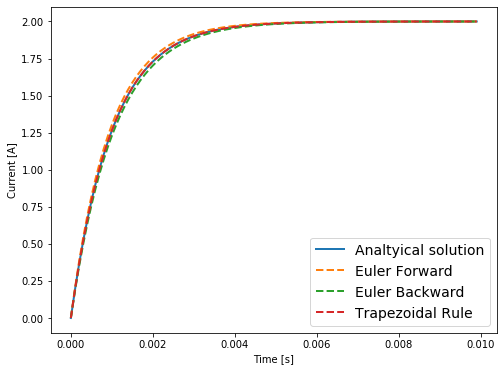

In [3]:
# Plots
# Time vector
t = np.arange(0, npoint)*Ts

plt.figure(figsize=(8,6))
plt.plot(t,I_analytical[0,:], linewidth=2)
plt.plot(t,I_ef[0,:],'--', linewidth=2)
plt.plot(t,I_eb[0,:],'--', linewidth=2)
plt.plot(t,I_tr[0,:],'--', linewidth=2)

plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.legend(['Analtyical solution', 'Euler Forward', 'Euler Backward', 'Trapezoidal Rule'], prop={'size': 14})
plt.show()